In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170508288/170498071 [==============================] - 11s 0us/step


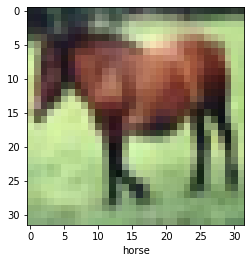

In [ ]:
# Let's look at a one image
IMG_INDEX = 7  # change this to look at other images

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [ ]:
model = models.Sequential()
#Feature Learning
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#Classification
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
prediction = model(train_images[:1]).numpy()
prediction

array([[ 0.10601994, -0.13280728, -0.03547163, -0.01531995,  0.01175541,
         0.09220099,  0.01978506, -0.17336017, -0.02796198,  0.0336652 ]],
      dtype=float32)

In [ ]:
tf.nn.softmax(prediction).numpy()

array([[0.11215663, 0.08832905, 0.09735896, 0.09934082, 0.10206724,
        0.1106174 , 0.10289011, 0.08481872, 0.09809285, 0.10432819]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(train_labels[:1], prediction).numpy()

2.2740936

In [ ]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [ ]:
model.get_weights()[4].shape


(3, 3, 64, 64)

In [ ]:
model.fit(train_images, train_labels, epochs=50)

Epoch 1/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7208 - accuracy: 0.7477
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6699 - accuracy: 0.7661
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.6307 - accuracy: 0.7791
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5893 - accuracy: 0.7941
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5535 - accuracy: 0.8052
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.5239 - accuracy: 0.8154
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4902 - accuracy: 0.8280
Epoch 8/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4607 - accuracy: 0.8385
Epoch 9/50
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4343 - accuracy: 0.8447
Epoch 10/50
1563/1563 [==============================] - 10s 6ms/step - l

In [ ]:
#Evaluate accuracy on the test set
model.evaluate(test_images, test_labels, verbose=2)


313/313 - 1s - loss: 2.7082 - accuracy: 0.6820


[2.708164930343628, 0.6819999814033508]